In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19275 entries, 0 to 19274
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19275 non-null  object 
 1   temperature     19275 non-null  float64
 2   pressure        19275 non-null  float64
 3   humidity        19275 non-null  float64
 4   wind_speed      19275 non-null  float64
 5   wind_direction  19275 non-null  float64
 6   precipitation   19275 non-null  float64
 7   snowing         19275 non-null  bool   
 8   cloudiness      19275 non-null  float64
 9   target          19275 non-null  float64
dtypes: bool(1), float64(8), object(1)
memory usage: 1.3+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19275 entries, 0 to 19274
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19275 non-null  object 
 1   temperature     19275 non-null  float64
 2   pressure        19275 non-null  float64
 3   humidity        19275 non-null  float64
 4   wind_speed      19275 non-null  float64
 5   wind_direction  19275 non-null  float64
 6   precipitation   19275 non-null  float64
 7   snowing         19275 non-null  bool   
 8   cloudiness      19275 non-null  float64
dtypes: bool(1), float64(7), object(1)
memory usage: 1.2+ MB


In [5]:
train.head(5)

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
0,TRAIN_00000,27.8816,1013.6,46.8,2.4,232.4,0.00,False,0.0,1.180
1,TRAIN_00001,5.7540,1026.6,76.6,3.6,172.0,0.00,False,8.8,8.581
2,TRAIN_00002,20.8220,1016.2,64.8,2.2,206.0,0.06,False,23.0,3.978
3,TRAIN_00003,20.0758,1017.4,72.6,0.8,215.4,0.00,False,0.0,8.301
4,TRAIN_00004,7.5260,1023.2,82.8,1.2,158.0,0.00,False,15.0,1.692


In [6]:
train.describe()

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,cloudiness,target
count,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000
mean,17.288476,1059.825712,68.948763,2.476970,166.578179,0.076572,25.749748,5.477028
std,7.192604,2544.132430,14.856929,1.359942,57.313099,0.193110,17.628612,3.217581
min,-0.208137,812.600000,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.712000,1012.600000,57.800000,1.400000,127.000000,0.000000,12.000000,2.956000
50%,16.530000,1016.800000,70.800000,2.200000,166.600000,0.000000,23.000000,4.837000
75%,22.559000,1021.000000,80.800000,3.200000,208.000000,0.060000,37.000000,7.436500
max,37.058000,201373.000000,100.000000,29.800000,338.000000,3.180000,93.600000,17.344000


In [7]:
test.describe()

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,cloudiness
count,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000
mean,17.234841,1070.601639,68.924182,2.495699,166.699642,0.077166,25.564887
std,7.191292,2591.110215,14.794539,1.365812,57.041635,0.198388,17.583694
min,-0.091600,812.400000,24.400000,0.200000,0.000000,0.000000,0.000000
25%,11.704250,1012.600000,57.800000,1.400000,127.000000,0.000000,12.000000
50%,16.498000,1016.800000,70.600000,2.200000,166.000000,0.000000,23.000000
75%,22.550000,1021.000000,80.800000,3.200000,206.000000,0.060000,36.600000
max,37.116000,202469.000000,100.000000,17.400000,337.000000,3.180000,92.000000


In [8]:
train.loc[train['pressure']>= 1100]

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
495,TRAIN_00495,9.178200,201149.4,71.4,4.6,278.0,0.24,False,68.8,8.606
970,TRAIN_00970,9.638300,21229.4,63.8,1.0,139.8,0.06,False,27.2,3.874
999,TRAIN_00999,11.862600,21217.8,60.4,1.4,133.0,2.46,False,33.6,3.999
1361,TRAIN_01361,7.499469,20825.0,57.0,3.4,265.0,0.18,False,18.4,9.665
1788,TRAIN_01788,11.926000,21151.4,56.2,3.6,205.0,0.06,False,47.2,5.937
4754,TRAIN_04754,7.979063,21008.2,69.0,2.8,161.8,2.58,False,56.0,5.937
5186,TRAIN_05186,11.363000,20808.6,67.8,3.2,208.8,0.24,False,49.6,12.797
5823,TRAIN_05823,11.105400,10882.2,62.6,5.4,288.6,0.66,False,24.0,12.254
6402,TRAIN_06402,12.583600,21198.8,61.0,2.0,172.2,0.06,False,34.4,4.601
6559,TRAIN_06559,9.613200,20799.0,53.6,4.0,304.2,3.00,False,18.4,11.342


In [9]:
# 질적 변수
qual_df = train[['snowing']]

# 양적 변수
quan_df = train.drop(columns = ['id', 'snowing'])

array([[<AxesSubplot: title={'center': 'temperature'}>,
        <AxesSubplot: title={'center': 'pressure'}>,
        <AxesSubplot: title={'center': 'humidity'}>],
       [<AxesSubplot: title={'center': 'wind_speed'}>,
        <AxesSubplot: title={'center': 'wind_direction'}>,
        <AxesSubplot: title={'center': 'precipitation'}>],
       [<AxesSubplot: title={'center': 'cloudiness'}>,
        <AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >]],
      dtype=object)

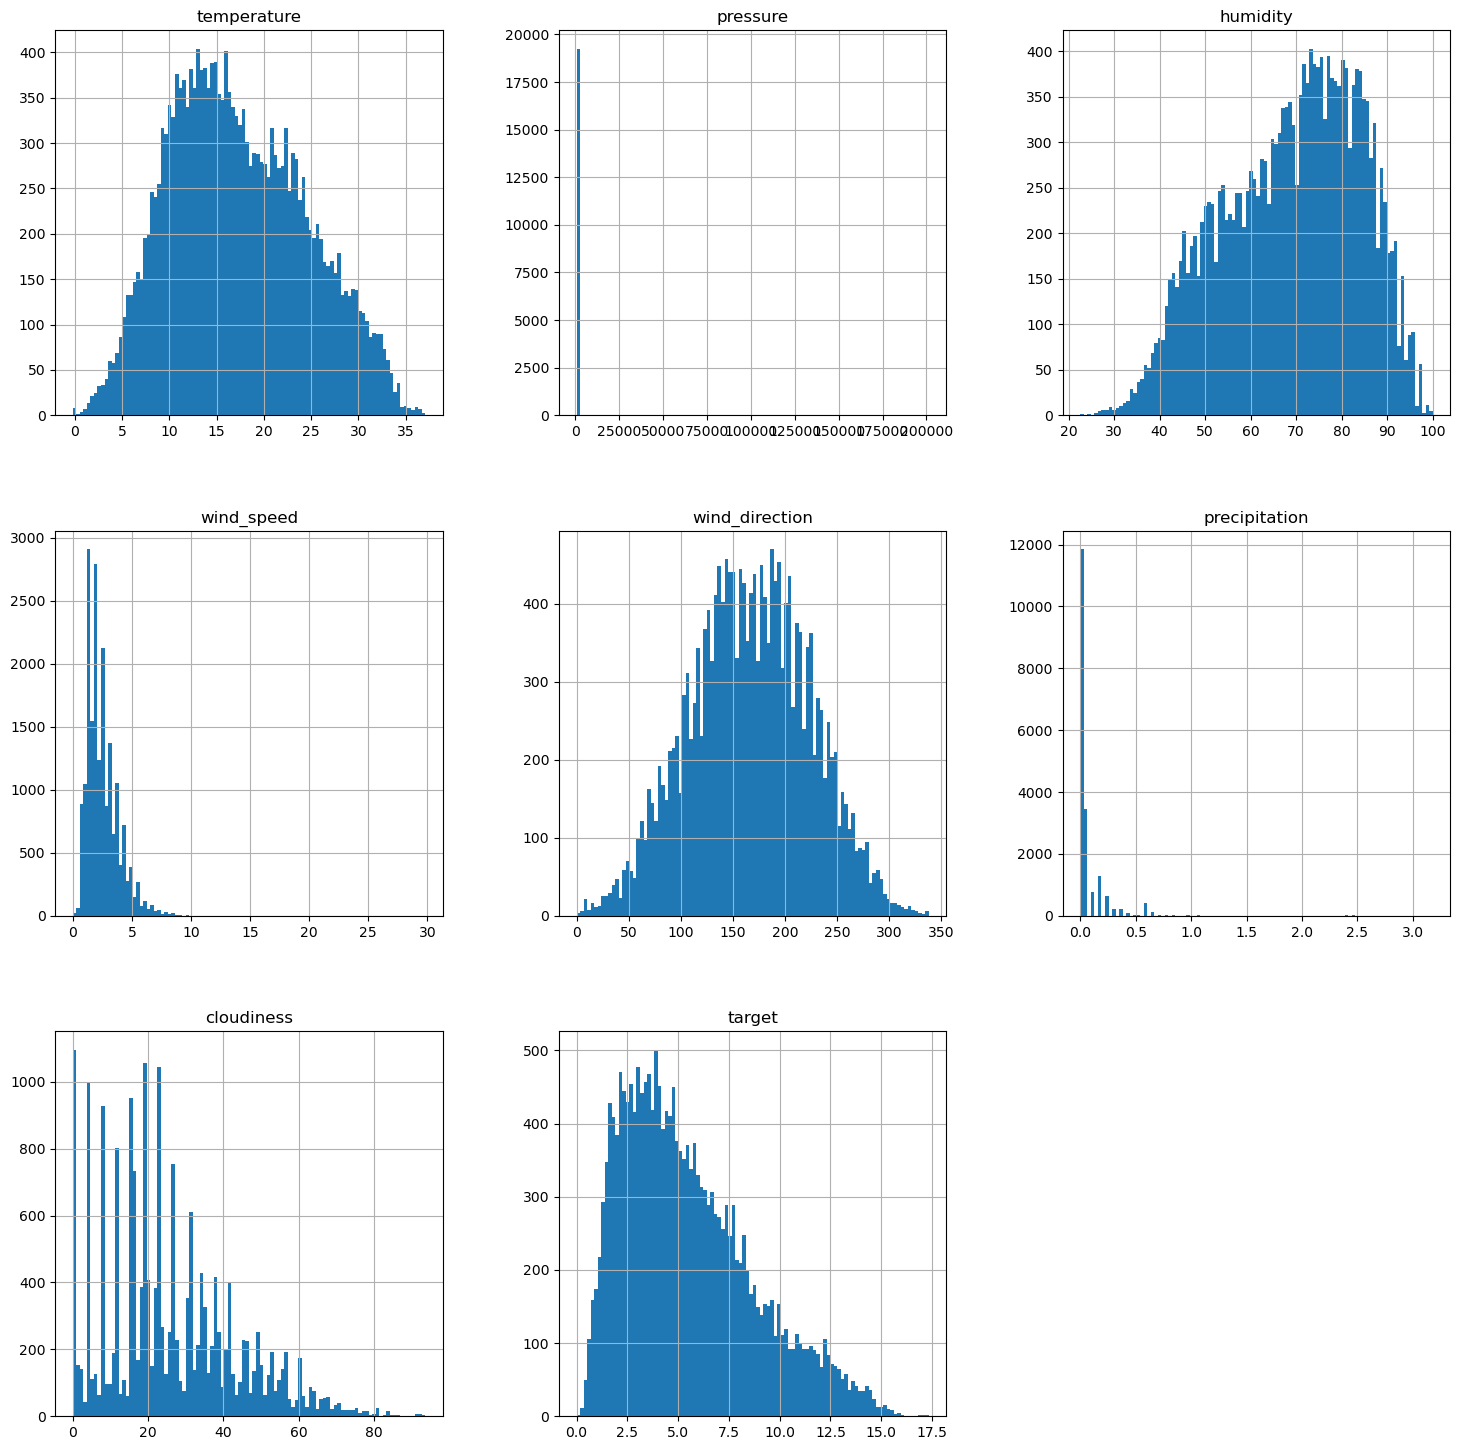

In [10]:
quan_df.hist(bins=100, figsize=(18, 18
                               ))

<AxesSubplot: xlabel='snowing', ylabel='count'>

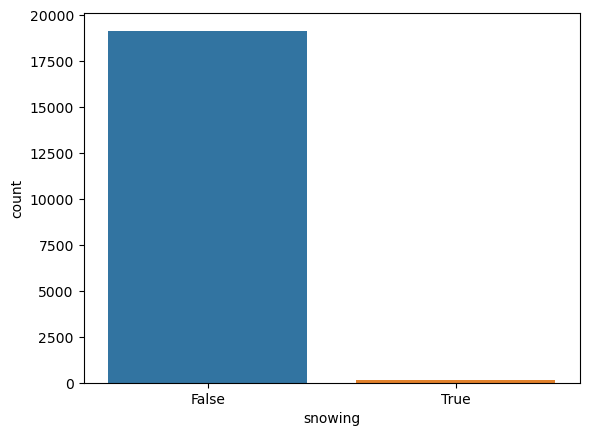

In [11]:
sns.countplot(x = qual_df['snowing'])

<function seaborn.categorical.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)>

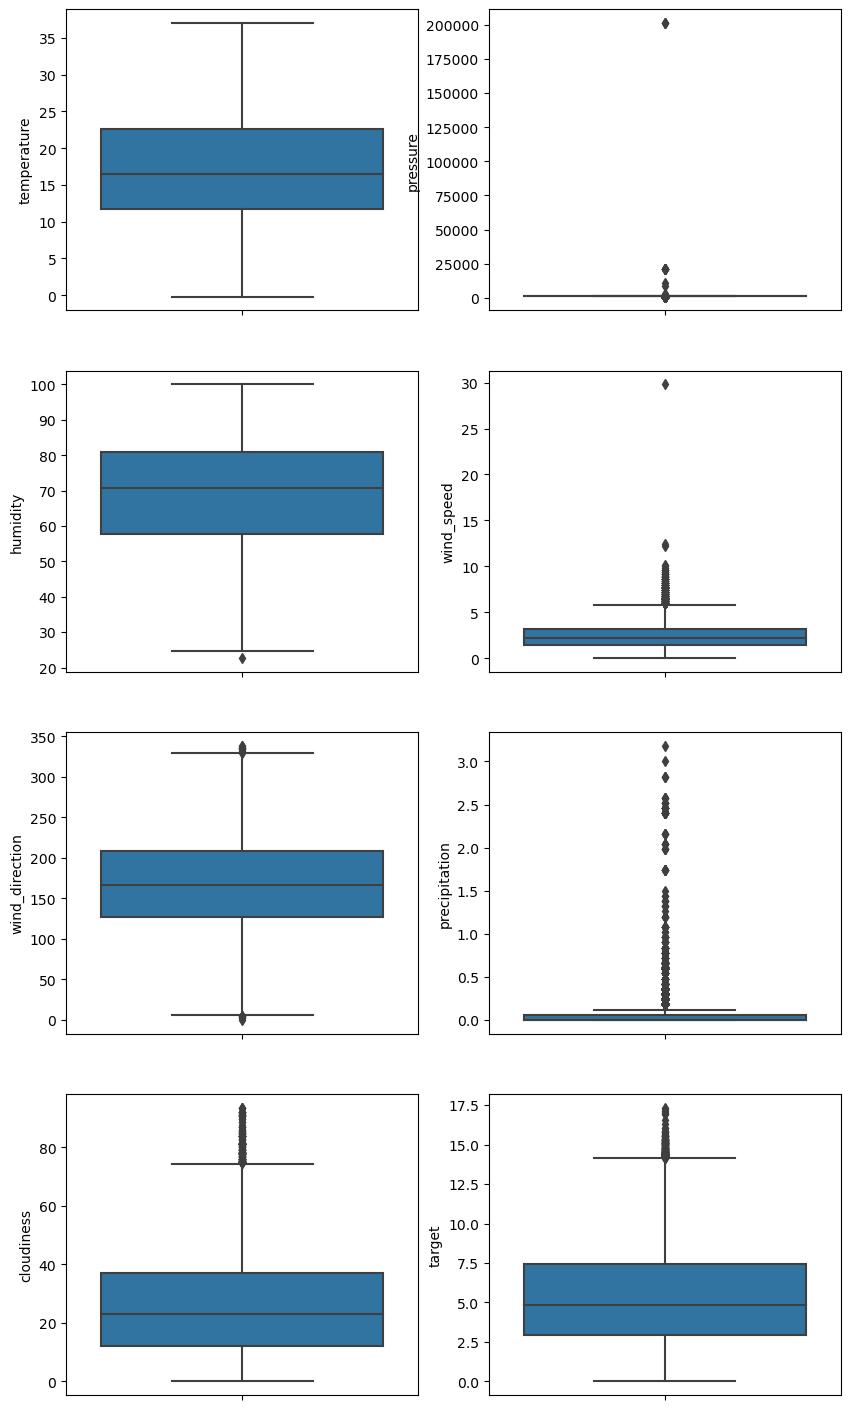

In [12]:
#이상치 확인
fig, axes = plt.subplots(4,2, figsize=(10,18))

sns.boxplot(y = quan_df['temperature'], ax=axes[0][0])
sns.boxplot(y = quan_df['pressure'], ax=axes[0][1])

sns.boxplot(y = quan_df['humidity'], ax=axes[1][0])
sns.boxplot(y = quan_df['wind_speed'], ax=axes[1][1])

sns.boxplot(y = quan_df['wind_direction'], ax=axes[2][0])
sns.boxplot(y = quan_df['precipitation'], ax=axes[2][1])

sns.boxplot(y = quan_df['cloudiness'], ax=axes[3][0])
sns.boxplot(y = quan_df['target'], ax=axes[3][1])

sns.boxplot

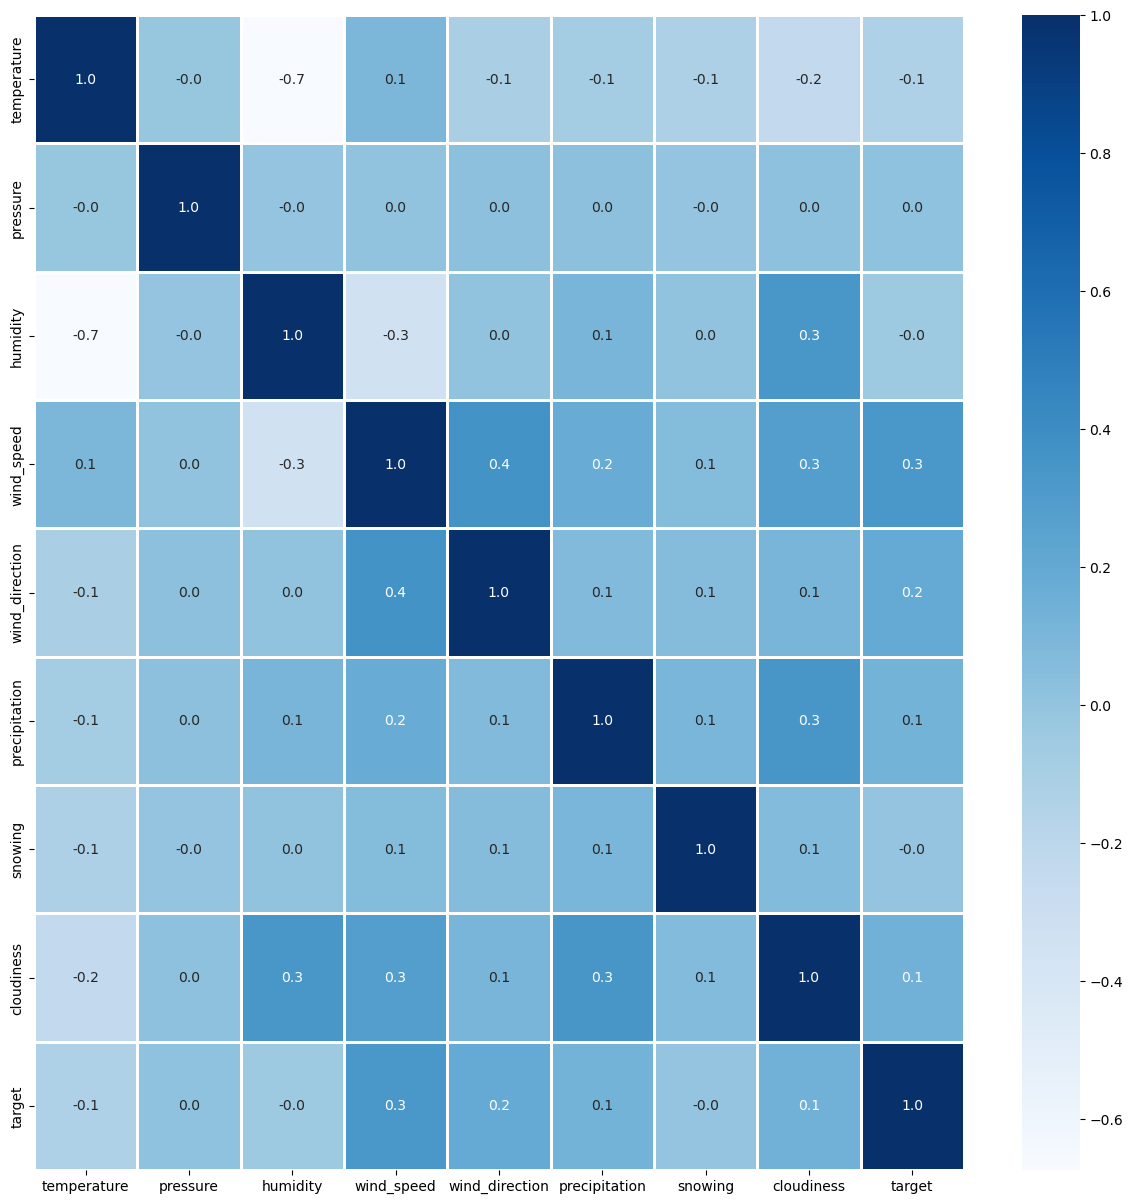

In [17]:
#상관관계 히트맵
plt.figure(figsize = (15,15))
sns.heatmap(train.drop(columns=['id'], axis=1).corr(), annot = True, fmt = '.1f', linewidth = 1, cmap = 'Blues')

plt.show()

### 이상치 확인 및 처리
- 다른 컬럼들에 비해 train, test의 pressure, wind_speed, precipitation 가 이상치가 많이 확인 되었음

In [38]:
def get_outlier(df, columns, weight):
    fraud = df[columns]
    q25 = fraud.quantile(0.25)
    q75 = fraud.quantile(0.75)
    iqr = q75 - q25
    iqr_weight = iqr * weight
    
    lowest = q25 - iqr_weight
    highest = q75 + iqr_weight
    print("lowest", fraud[fraud < lowest])
    print("highest",fraud[fraud > highest])
    
    return fraud[(fraud < lowest) | (fraud > highest)].index

In [41]:
get_outlier(df_train, 'precipitation', 1.5)

lowest Series([], Name: precipitation, dtype: float64)
highest 12       0.18
18       0.18
19       0.60
22       0.18
26       0.24
         ... 
19251    0.30
19253    0.24
19261    0.36
19268    0.18
19272    0.36
Name: precipitation, Length: 3204, dtype: float64


Int64Index([   12,    18,    19,    22,    26,    30,    32,    40,    48,
               49,
            ...
            19222, 19228, 19242, 19246, 19247, 19251, 19253, 19261, 19268,
            19272],
           dtype='int64', length=3204)

In [34]:
df_train = train.copy()
outlier_index = get_outlier(train, 'pressure', 5)
df_train.drop(outlier_index, axis = 0, inplace = True)

<function seaborn.categorical.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)>

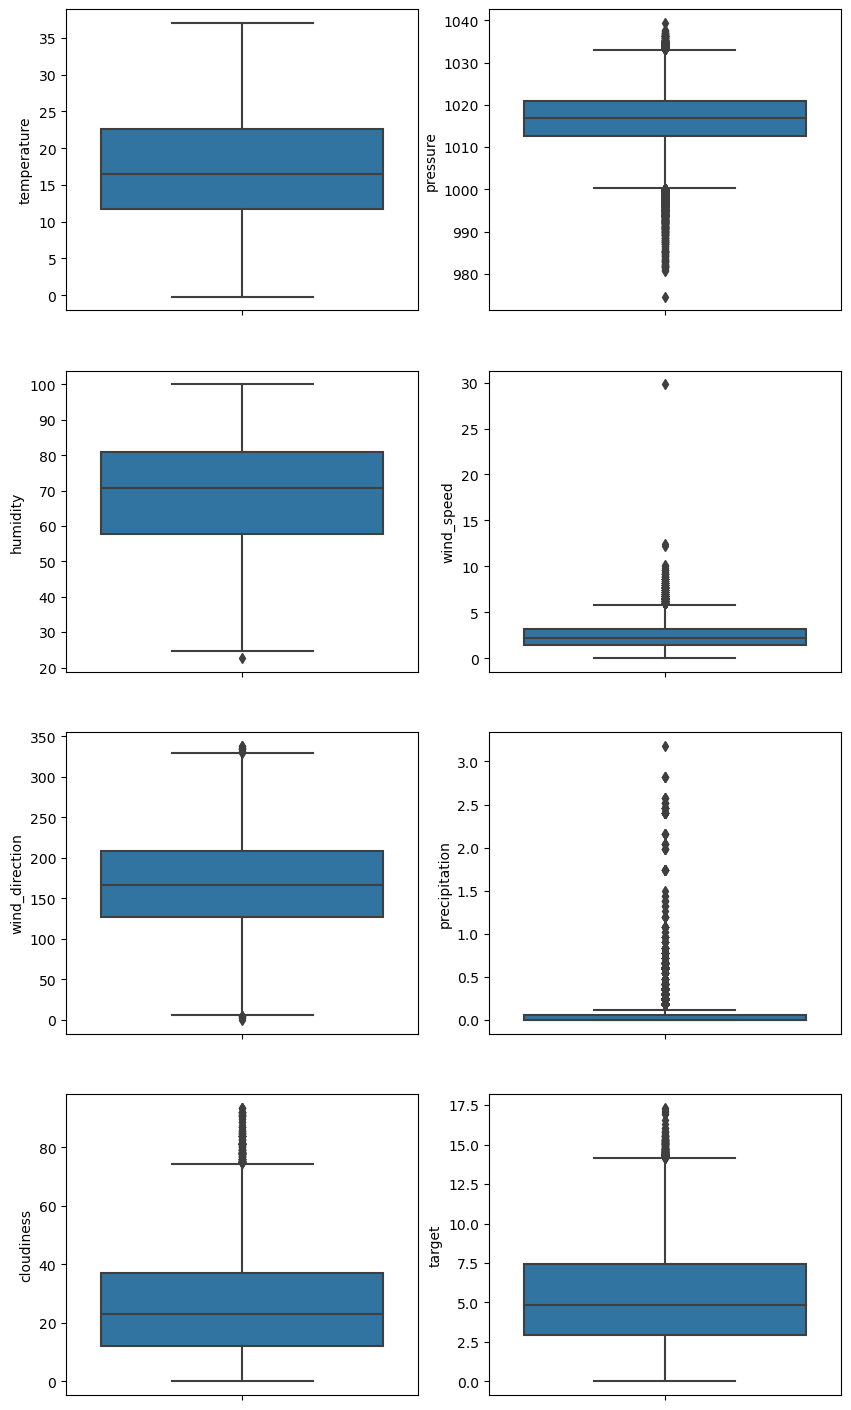

In [36]:
# 양적 변수
quan_df = df_train.drop(columns = ['id', 'snowing'])
#이상치 확인
fig, axes = plt.subplots(4,2, figsize=(10,18))

sns.boxplot(y = quan_df['temperature'], ax=axes[0][0])
sns.boxplot(y = quan_df['pressure'], ax=axes[0][1])

sns.boxplot(y = quan_df['humidity'], ax=axes[1][0])
sns.boxplot(y = quan_df['wind_speed'], ax=axes[1][1])

sns.boxplot(y = quan_df['wind_direction'], ax=axes[2][0])
sns.boxplot(y = quan_df['precipitation'], ax=axes[2][1])

sns.boxplot(y = quan_df['cloudiness'], ax=axes[3][0])
sns.boxplot(y = quan_df['target'], ax=axes[3][1])

sns.boxplot

In [51]:
df_test = test.copy()
# 양적 변수
outlier_index = get_outlier(df_test, 'pressure', 5)
df_test.drop(outlier_index, axis = 0, inplace = True)

lowest 4719    812.4
Name: pressure, dtype: float64
highest 868       20838.0
971       11040.6
2470      20854.4
3519      20808.0
4047      20766.8
6306      20829.8
6319      20803.8
6413      21028.8
6651      20888.8
7056      20997.0
7253      21065.0
7420       2832.0
7986      20800.0
8218      20817.0
9175     202469.0
9283      20846.0
10327     20871.4
11199     20796.8
11740    200983.2
12685     21185.4
14238     20858.4
14287     20774.0
17069     21235.4
18428     20774.8
18674     20769.2
19074    201244.4
19201     21062.0
Name: pressure, dtype: float64


In [52]:
df_test

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness
0,TEST_00000,20.702000,1021.0,76.4,2.0,104.8,0.00,False,23.0
1,TEST_00001,18.673669,1014.4,59.6,2.4,179.2,0.12,False,32.4
2,TEST_00002,29.908000,1020.6,49.6,2.6,78.0,0.60,False,23.0
3,TEST_00003,24.504000,1014.6,61.0,1.8,118.0,0.00,False,15.0
4,TEST_00004,12.590000,1011.4,70.8,1.8,110.0,0.12,False,34.0
...,...,...,...,...,...,...,...,...,...
19270,TEST_19270,25.180000,1020.2,64.8,1.6,122.0,0.00,False,34.0
19271,TEST_19271,16.940000,1022.6,72.4,1.8,245.6,0.00,False,19.0
19272,TEST_19272,9.032000,1036.4,94.4,2.2,219.2,0.00,False,18.0
19273,TEST_19273,15.774000,1021.8,79.0,0.8,182.0,0.00,False,27.0


In [53]:
df_test.describe()

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,cloudiness
count,19247.000000,19247.000000,19247.000000,19247.000000,19247.000000,19247.000000,19247.000000
mean,17.245555,1016.095714,68.935897,2.493531,166.574479,0.076695,25.547992
std,7.190496,8.330040,14.799897,1.363767,56.962976,0.196726,17.580565
min,-0.091600,978.200000,24.400000,0.200000,0.000000,0.000000,0.000000
25%,11.712000,1012.500000,57.800000,1.400000,126.800000,0.000000,12.000000
50%,16.522000,1016.800000,70.600000,2.200000,166.000000,0.000000,23.000000
75%,22.555000,1021.000000,80.800000,3.200000,206.000000,0.060000,36.600000
max,37.116000,1039.800000,100.000000,17.400000,337.000000,3.180000,92.000000


<function seaborn.categorical.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)>

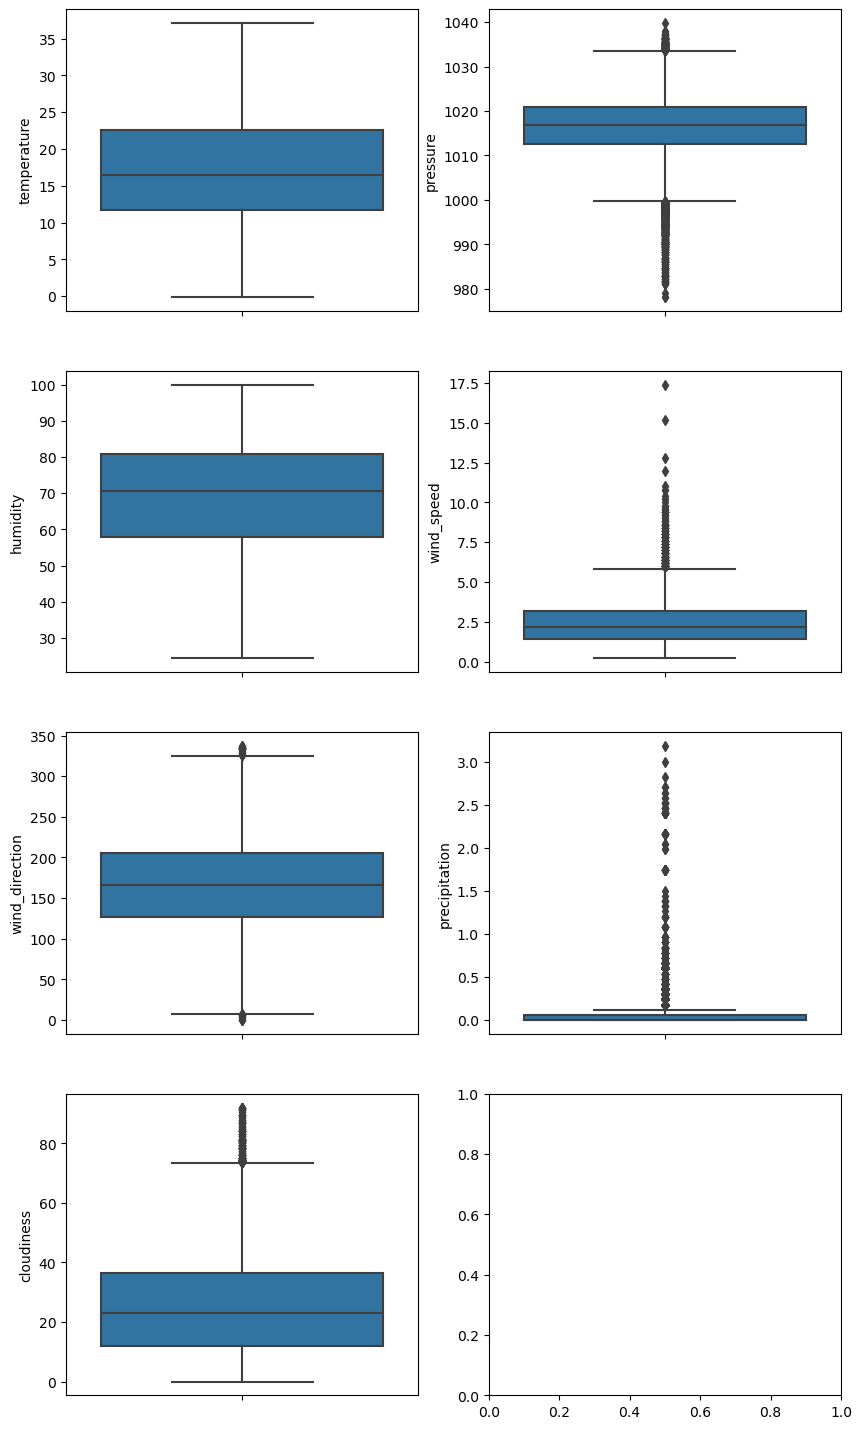

In [54]:

# 양적 변수
quan_df = df_test.drop(columns = ['id', 'snowing'])
#이상치 확인
fig, axes = plt.subplots(4,2, figsize=(10,18))

sns.boxplot(y = df_test['temperature'], ax=axes[0][0])
sns.boxplot(y = df_test['pressure'], ax=axes[0][1])

sns.boxplot(y = df_test['humidity'], ax=axes[1][0])
sns.boxplot(y = df_test['wind_speed'], ax=axes[1][1])

sns.boxplot(y = df_test['wind_direction'], ax=axes[2][0])
sns.boxplot(y = df_test['precipitation'], ax=axes[2][1])

sns.boxplot(y = df_test['cloudiness'], ax=axes[3][0])
# sns.boxplot(y = df_test['target'], ax=axes[3][1])

sns.boxplot

In [45]:
train_x = df_train.drop(columns=['id', 'target'])
train_y = df_train['target']

In [55]:
test_x = test.drop(columns=['id'])

### Data Pre_processing

In [57]:
le = LabelEncoder()
le = le.fit(train_x['snowing'])
train_x['snowing'] = le.transform(train_x['snowing'])

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness
0,27.881600,1013.6,46.8,2.4,232.4,0.00,0,0.0
1,5.754000,1026.6,76.6,3.6,172.0,0.00,0,8.8
2,20.822000,1016.2,64.8,2.2,206.0,0.06,0,23.0
3,20.075800,1017.4,72.6,0.8,215.4,0.00,0,0.0
4,7.526000,1023.2,82.8,1.2,158.0,0.00,0,15.0
...,...,...,...,...,...,...,...,...
19270,12.020000,1023.8,81.4,1.6,176.0,0.00,0,0.0
19271,17.232000,993.2,78.2,2.0,198.0,0.06,0,26.4
19272,13.748000,999.8,65.0,6.4,260.0,0.36,0,53.0
19273,19.354000,1019.4,45.4,2.4,120.0,0.06,0,20.0


In [58]:
le.classes_

array([False,  True])

In [59]:
for label in np.unique(test_x['snowing']):
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)
    test_x['snowing'] = le.transform(test_x['snowing'])
print('Done')

Done


In [60]:
LR = LinearRegression()

In [61]:
LR.fit(train_x, train_y)

LinearRegression()

In [62]:
preds = LR.predict(test_x)

In [63]:
submission['target'] = preds
submission.head()

,id,target
0,TEST_00000,4.214322
1,TEST_00001,5.689069
2,TEST_00002,4.870825
3,TEST_00003,4.295239
4,TEST_00004,5.530683


In [64]:
submission.to_csv('submit.csv', index=False)